In [1]:
### importing libraries ###

import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [3]:
# features
features_train = pd.read_csv('features_train.csv', index_col = 0)
features_test = pd.read_csv('features_test.csv', index_col = 0)

# target
target_train = pd.read_csv('target_train.csv', index_col = 0)
target_test = pd.read_csv('target_test.csv', index_col = 0)

In [4]:
### building ANN ###

def ann():
    classifier = Sequential()
    
    classifier.add(Dense(6, activation = 'relu', input_dim = 12))
    classifier.add(Dense(6, activation = 'relu'))
    classifier.add(Dense(6, activation = 'relu'))
    
    classifier.add(Dropout(0.2))
    
    classifier.add(Dense(1, activation = 'relu'))
    
    classifier.compile(optimizer = 'adam', loss = 'mse')
    
    return classifier

In [5]:
# fitting model
model = ann()
history = model.fit(features_train, target_train, validation_data = (features_test, target_test), 
                    batch_size = 10, epochs = 100)

2022-04-07 11:33:21.314439: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-07 11:33:21.315010: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Epoch 1/100


2022-04-07 11:33:22.047764: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-07 11:33:22.238744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 2s 14ms/step - loss: 1.2583 - val_loss: 1.1549
Epoch 2/100
26/26 [==============================] - ETA: 0s - loss: 1.1407

2022-04-07 11:33:24.283461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 0s 7ms/step - loss: 1.1407 - val_loss: 1.0632
Epoch 3/100
26/26 [==============================] - 0s 6ms/step - loss: 1.0961 - val_loss: 1.0264
Epoch 4/100
26/26 [==============================] - 0s 6ms/step - loss: 1.0265 - val_loss: 1.0187
Epoch 5/100
26/26 [==============================] - 0s 7ms/step - loss: 1.0123 - val_loss: 1.0171
Epoch 6/100
26/26 [==============================] - 0s 6ms/step - loss: 1.0351 - val_loss: 1.0151
Epoch 7/100
26/26 [==============================] - 0s 6ms/step - loss: 1.0353 - val_loss: 1.0136
Epoch 8/100
26/26 [==============================] - 0s 6ms/step - loss: 1.0154 - val_loss: 1.0125
Epoch 9/100
26/26 [==============================] - 0s 7ms/step - loss: 1.0225 - val_loss: 1.0109
Epoch 10/100
26/26 [==============================] - 0s 7ms/step - loss: 1.0220 - val_loss: 1.0098
Epoch 11/100
26/26 [==============================] - 0s 7ms/step - loss: 1.0082 - val_loss: 1.0096
Epoch 12/100
26/26 [

26/26 [==============================] - 0s 6ms/step - loss: 1.0065 - val_loss: 1.0255
Epoch 85/100
26/26 [==============================] - 0s 6ms/step - loss: 1.0019 - val_loss: 1.0267
Epoch 86/100
26/26 [==============================] - 0s 6ms/step - loss: 0.9905 - val_loss: 1.0290
Epoch 87/100
26/26 [==============================] - 0s 6ms/step - loss: 1.0041 - val_loss: 1.0305
Epoch 88/100
26/26 [==============================] - 0s 6ms/step - loss: 0.9972 - val_loss: 1.0296
Epoch 89/100
26/26 [==============================] - 0s 6ms/step - loss: 0.9995 - val_loss: 1.0278
Epoch 90/100
26/26 [==============================] - 0s 6ms/step - loss: 1.0017 - val_loss: 1.0297
Epoch 91/100
26/26 [==============================] - 0s 6ms/step - loss: 0.9934 - val_loss: 1.0318
Epoch 92/100
26/26 [==============================] - 0s 6ms/step - loss: 0.9999 - val_loss: 1.0330
Epoch 93/100
26/26 [==============================] - 0s 6ms/step - loss: 1.0016 - val_loss: 1.0340
Epoch 94/100


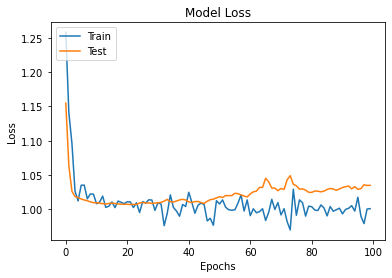

In [6]:
### plotting loss ###

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc = 'upper left')

In [ ]:
# It seems that about 10 epochs is when the ANN starts to overtrain. We will now retrain the model to use only 10  # epochs.

In [8]:
# fitting model
model = ann()
model.fit(features_train, target_train, validation_data = (features_test, target_test), 
                    batch_size = 10, epochs = 10)

Epoch 1/10
25/26 [===========================>..] - ETA: 0s - loss: 1.3110

2022-04-07 11:34:42.507135: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 0s 10ms/step - loss: 1.3714 - val_loss: 1.1149
Epoch 2/10
14/26 [===============>..............] - ETA: 0s - loss: 1.1702

2022-04-07 11:34:42.755217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 0s 6ms/step - loss: 1.1297 - val_loss: 1.0437
Epoch 3/10
26/26 [==============================] - 0s 6ms/step - loss: 1.0843 - val_loss: 1.0203
Epoch 4/10
26/26 [==============================] - 0s 6ms/step - loss: 1.0556 - val_loss: 1.0158
Epoch 5/10
26/26 [==============================] - 0s 7ms/step - loss: 1.0303 - val_loss: 1.0159
Epoch 6/10
26/26 [==============================] - 0s 6ms/step - loss: 1.0380 - val_loss: 1.0160
Epoch 7/10
26/26 [==============================] - 0s 6ms/step - loss: 1.0145 - val_loss: 1.0163
Epoch 8/10
26/26 [==============================] - 0s 6ms/step - loss: 1.0118 - val_loss: 1.0147
Epoch 9/10
26/26 [==============================] - 0s 7ms/step - loss: 1.0109 - val_loss: 1.0144
Epoch 10/10
26/26 [==============================] - 0s 6ms/step - loss: 1.0092 - val_loss: 1.0140


In [9]:
### rmse ###

# prediction
pred = model.predict(features_test)

print('RMSE is:', 0.9877 ** 0.5, 'and the r2 is:', r2_score(target_test, pred))

RMSE is: 0.9938309715439543 and the r2 is: -0.014012914230401519


2022-04-07 11:35:13.367399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [ ]:
# We were able to improve our RMSE. However, the values are still not great.
# Conclusion

# ANNs are not a great way to model forest fire damage.

 #   r2 = -0.0140
 #   RMSE = 0.9938